In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = df.iloc[:, [3, 4]].values

DENDROGRAM

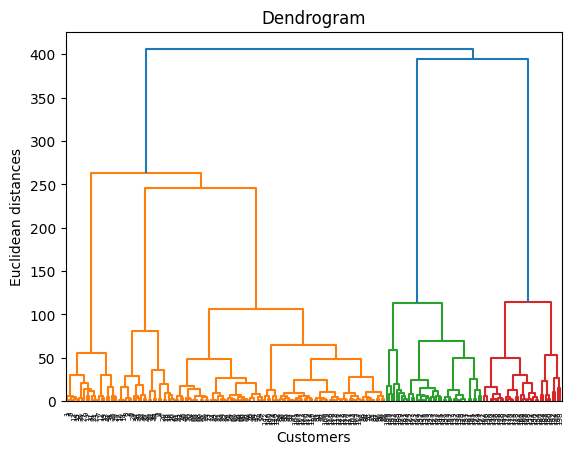

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

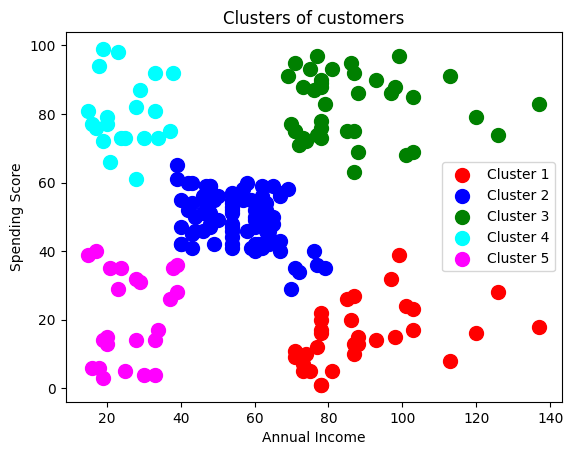

In [6]:
plt.scatter(X[y_hc ==0, 0],X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc ==1, 0],X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc ==2, 0],X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc ==3, 0],X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc ==4, 0],X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values  # Using Annual Income & Spending Score

# Normalize data (optional but helps divisive clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


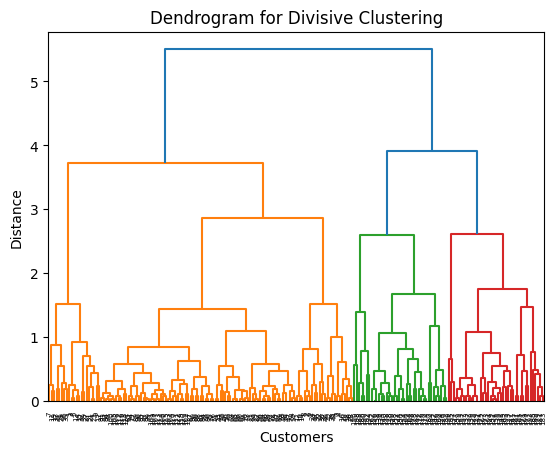

In [2]:
# Using hierarchical clustering with 'complete' linkage for divisive clustering
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='complete'))

# Plot dendrogram
plt.title('Dendrogram for Divisive Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


In [3]:
from scipy.cluster.hierarchy import fcluster

# Cutting the dendrogram at 5 clusters
y_divisive = fcluster(sch.linkage(X_scaled, method='complete'), 5, criterion='maxclust')


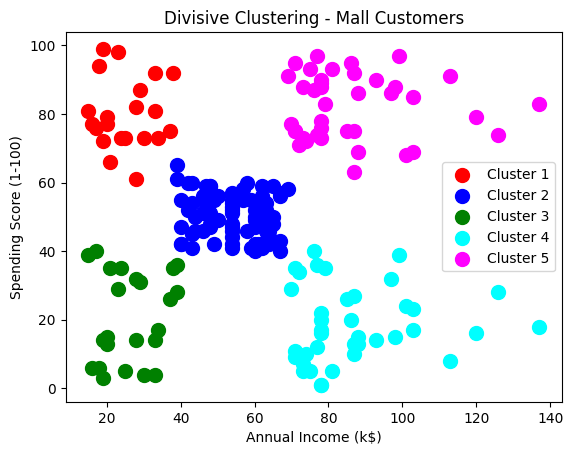

In [4]:
plt.scatter(X[y_divisive == 1, 0], X[y_divisive == 1, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_divisive == 2, 0], X[y_divisive == 2, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_divisive == 3, 0], X[y_divisive == 3, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_divisive == 4, 0], X[y_divisive == 4, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_divisive == 5, 0], X[y_divisive == 5, 1], s=100, c='magenta', label='Cluster 5')

plt.title('Divisive Clustering - Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
